# Binary data representation

Write a code, which, using [2's complement](https://en.wikipedia.org/wiki/Two%27s_complement) will represent numbers `-2` and `7` in 4-bit encoding (separately!).

In [5]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit.visualization import plot_histogram
from qiskit import execute, Aer
import matplotlib.pyplot as plt

In [10]:
qr = QuantumRegister(4, 'qubits')
cr = ClassicalRegister(4, 'bits')
qc = QuantumCircuit(qr, cr)

# write your code here 

qc.measure(qr, cr)

Validate your code produces exaclty what you planned!

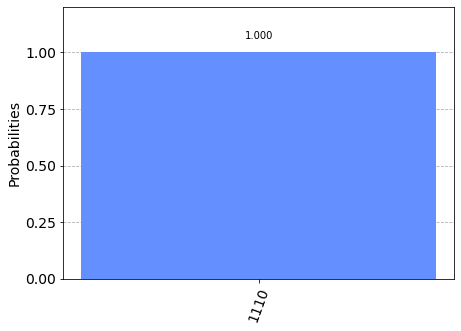

In [11]:
job = execute(qc, Aer.get_backend('qasm_simulator'), shots=1000)
counts = job.result().get_counts(qc)
plot_histogram(counts)
plt.show()

# Increment implementation

## Preparation. Multicontrol

Genetalization of controlled gates is [MCMT](https://qiskit.org/documentation/stubs/qiskit.circuit.library.MCMT.html). But we can do it easier, with standard gates. Up to 3 there are [classes in qiskit](https://qiskit.org/documentation/stubs/qiskit.circuit.library.C3XGate.html#qiskit.circuit.library.C3XGate). Or you can go with `XGate`.

┌───┐     ┌─┐         
qubits_0: ┤ X ├──■──┤M├─────────
          ├───┤  │  └╥┘┌─┐      
qubits_1: ┤ X ├──■───╫─┤M├──────
          ├───┤  │   ║ └╥┘┌─┐   
qubits_2: ┤ X ├──■───╫──╫─┤M├───
          └───┘┌─┴─┐ ║  ║ └╥┘┌─┐
qubits_3: ─────┤ X ├─╫──╫──╫─┤M├
               └───┘ ║  ║  ║ └╥┘
  bits: 4/═══════════╩══╩══╩══╩═
                     0  1  2  3

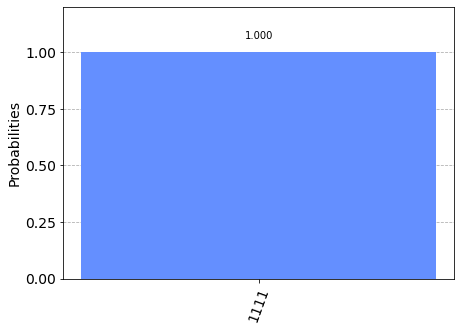

In [27]:
from qiskit.circuit.library import XGate
cccx = XGate().control(3)

qr = QuantumRegister(4, 'qubits')
cr = ClassicalRegister(4, 'bits')
qc = QuantumCircuit(qr, cr)

qc.x([0, 1, 2])
qc.append(cccx, qr)
qc.measure(qr, cr)
display(qc.draw())

job = execute(qc, Aer.get_backend('qasm_simulator'), shots=1000)
counts = job.result().get_counts(qc)
plot_histogram(counts)
plt.show()

## Simple increment

┌───┐ ░                ┌───┐ ░ ┌─┐         
qubits_0: ┤ X ├─░───■────■────■──┤ X ├─░─┤M├─────────
          └───┘ ░   │    │  ┌─┴─┐└───┘ ░ └╥┘┌─┐      
qubits_1: ──────░───■────■──┤ X ├──────░──╫─┤M├──────
          ┌───┐ ░   │  ┌─┴─┐└───┘      ░  ║ └╥┘┌─┐   
qubits_2: ┤ X ├─░───■──┤ X ├───────────░──╫──╫─┤M├───
          └───┘ ░ ┌─┴─┐└───┘           ░  ║  ║ └╥┘┌─┐
qubits_3: ──────░─┤ X ├────────────────░──╫──╫──╫─┤M├
                ░ └───┘                ░  ║  ║  ║ └╥┘
  bits: 4/════════════════════════════════╩══╩══╩══╩═
                                          0  1  2  3

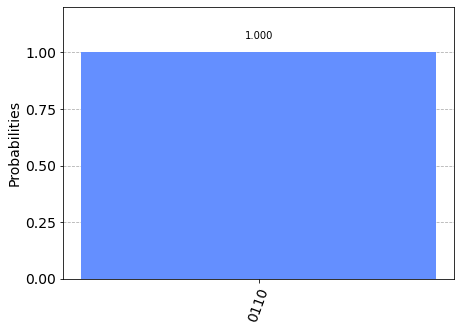

In [24]:
from qiskit.circuit.library import XGate
cccx = XGate().control(3)

qr = QuantumRegister(4, 'qubits')
cr = ClassicalRegister(4, 'bits')
qc = QuantumCircuit(qr, cr)

qc.x([0, 2])
qc.barrier()

################ YOUR CODE HERE #########################

#########################################################
qc.barrier()
qc.measure(qr, cr)
display(qc.draw())

job = execute(qc, Aer.get_backend('qasm_simulator'), shots=1000)
counts = job.result().get_counts(qc)
plot_histogram(counts)
plt.show()

## What about increment of superposition?

Prepare superposition of `-2` and `7` and apply increment to them. Prepare superposition of `0..7` and repeat.

HINT: $\frac{1}{\sqrt{2}}(|0111\rangle+|1110\rangle)$ is a $|\Psi^+\rangle$ Bell's pair on 0'th and 3'rd qubits.

In [ ]:
qr = QuantumRegister(4, 'qubits')
cr = ClassicalRegister(4, 'bits')
qc = QuantumCircuit(qr, cr)

########### YOUR CODE HERE ###############################


##########################################################

qc.barrier()
qc.measure(qr, cr)
display(qc.draw())

job = execute(qc, Aer.get_backend('qasm_simulator'), shots=1000)
counts = job.result().get_counts(qc)
plot_histogram(counts)
plt.show()

# Operator class - small step aside

[source](https://qiskit.org/documentation/tutorials/circuits_advanced/02_operators_overview.html).

The Operator class is used in Qiskit to represent matrix operators acting on a quantum system. It has several methods to build composite operators using tensor products of smaller operators, and to compose operators.

Operators can be non-square.

In [2]:
from qiskit.quantum_info.operators import Operator, Pauli
from qiskit.extensions import RXGate, XGate, CXGate

XX = Operator([[0, 0, 0, 1], [0, 0, 1, 0], [0, 1, 0, 0], [1, 0, 0, 0]])
print(XX.dim)
print(XX.data)

print('Input dimensions:', XX.input_dims())
print('Output dimensions:', XX.output_dims())

(4, 4)
[[0.+0.j 0.+0.j 0.+0.j 1.+0.j]
 [0.+0.j 0.+0.j 1.+0.j 0.+0.j]
 [0.+0.j 1.+0.j 0.+0.j 0.+0.j]
 [1.+0.j 0.+0.j 0.+0.j 0.+0.j]]
Input dimensions: (2, 2)
Output dimensions: (2, 2)


In [ ]:
print(Operator(Pauli('ZY')))
print()

qc = QuantumCircuit(2)
qc.z(1)
qc.y(0)
print(Operator(qc))
print()

print(Operator(CXGate()))

In [ ]:
assert Operator(CXGate()).is_unitary()
assert Operator([[0, 1], [1, 1]]).is_unitary()

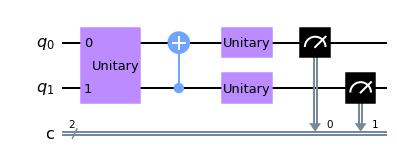

In [7]:
import numpy as np

# Create an operator
XX = Operator(Pauli(label='XX'))

# Add to a circuit
circ = QuantumCircuit(2, 2)
circ.append(XX, [0, 1])
circ.cx(1, 0)
circ.append(Operator([[1j, 0.], [0., -1j]]), [1])


import scipy.linalg

# some Hermitian
H = np.array([[1, -1/3], [-1/3, 1]])

# Get it's Unitary
U = scipy.linalg.expm(1j * H)
circ.append(Operator(U), [0])

circ.measure([0,1], [0,1])
circ.draw('mpl')

If Operator is Unitary, life is easier!

In [ ]:
from qiskit.compiler import transpile
from qiskit import BasicAer

backend = BasicAer.get_backend('qasm_simulator')
circ = transpile(circ, backend, basis_gates=['u1','u2','u3','cx'])
circ.draw()

Tensoring, composition, and linear combination

In [ ]:
A = Operator(Pauli('X'))
B = Operator(Pauli('Z'))

AB = A.expand(B)
import numpy as np

np.allclose(AB.data, Operator(Pauli('ZX')).data)

print(A.compose(B))
print()
print(A + 3 * B)

## TODO:

For a given Hamiltonian find it's gate implementation in the gate basis `['cx', 'x', 'h', 'y', 'z', 'rx', 'ry', 'rz']`. Use `expm()` to get unitary, `transpile()` and `decompose()` to get gates.

$H=\begin{pmatrix}0 & i \\ -i & 1\end{pmatrix}$.

In [ ]:
import numpy as np
from scipy.linalg import expm
from qiskit.compiler import transpile
from qiskit import BasicAer

backend = BasicAer.get_backend('qasm_simulator')

H = np.array([[0, 1j], [-1j, 1]])
######### YOUR CODE HERE ##############


## Hamiltonians to Unitaries

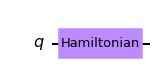

In [13]:
from qiskit.extensions import HamiltonianGate
unitary = HamiltonianGate(H, time=0.3)
circ = QuantumCircuit(1)
circ.append(unitary, [0])
circ.draw('mpl')

# Decrement

What are the ways to construct a decrement?
1. Constructive -- by solving a matrix form problem.
2. Engineering -- by using qiskit magic.

In [ ]:
## TODO your code here